In [38]:
# Imports
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

In [39]:
# Paramètres du modèle
Tc0 = 30 

scenarios = [
    {"Ta": 20, "ws": 2, "I": 100},
    {"Ta": 30, "ws": 1, "I": 2500}
]

# Paramètres de simulation
dt = 1.0
T_total = 30 * 60  # 30 minutes
N = int(T_total / dt)
t_vals = np.linspace(0, T_total, N + 1)

In [40]:
# Fonction
def dTc_dt(Tc, t, Ta, ws, I):
    facteur = (- ((ws ** 2) / 1600) * 0.4) - 0.1
    droite = (Tc - Ta - (((I ** 1.4) / 73785) * 130))
    return (facteur * droite) / 60

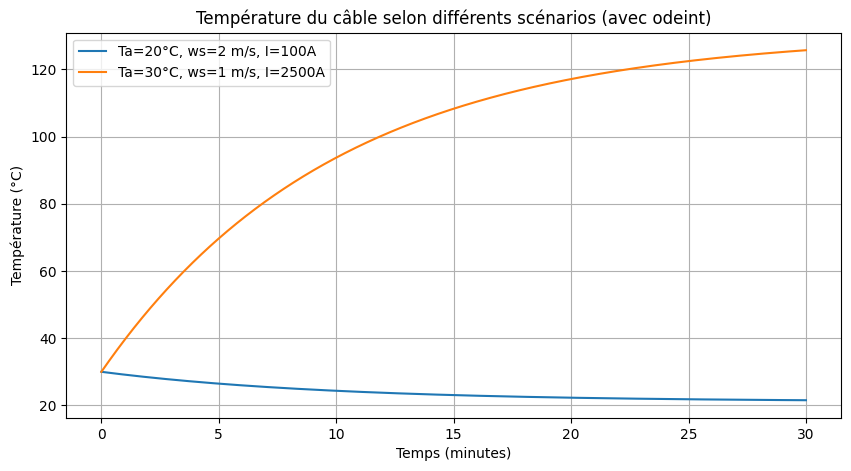

In [41]:
# Figure
plt.figure(figsize=(10, 5))

for sc in scenarios:
    sol = odeint(dTc_dt, Tc0, t_vals, args=(sc["Ta"], sc["ws"], sc["I"]))
    plt.plot(t_vals / 60, sol[:, 0], label=f'Ta={sc["Ta"]}°C, ws={sc["ws"]} m/s, I={sc["I"]}A')

plt.xlabel("Temps (minutes)")
plt.ylabel("Température (°C)")
plt.title("Température du câble selon différents scénarios (avec odeint)")
plt.legend()
plt.grid()
plt.show()